# Qunatum optimal control example

We first need to import few useful pakages and our qoct class.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from qoct import QH, QOCT

Start with some initial conditions of Hamiltonian matrix and initial control parameters.

In [37]:
H0 = np.matrix([[1,1],[1,1]])
Hctr = [[1,0],[0,-1]]
ctrl = .1*np.ones(1000)
phi = [[0],[1]]

Call QH module to build up equation of motion and states.

In [38]:
qh_test = QH(H0, Hctr, ctrl, phi)
time = qh_test.real_tim
phi = qh_test.phi_t()

Here we can show our first figure of probability variation in time.

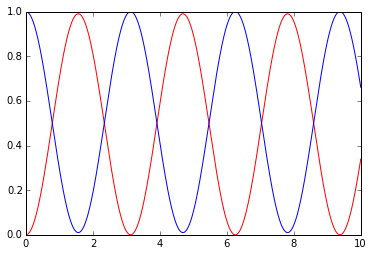

In [39]:
prob = np.real(phi*np.conjugate(phi))
plt.plot(time, prob[:,0,:],'r')
plt.plot(time, prob[:,1,:],'b')
plt.show()

Given the goal state we want and previous qh_test class into QOCT module to calculate optimal control pulse.

In [60]:
phi_g = [[1],[0]]
qoct_test = QOCT(qh_test, phi_g)
ctrl_test = qoct_test.run()

NameError: global name 'phi_g' is not defined

Now we can plot our optimal control.

In [58]:
ctrl_test = qoct_test.run()
plt.plot(time[:-1], ctrl_test)
plt.show()

NameError: global name 'phi_g' is not defined

and probability variation in time.

In [32]:
phi_new = qh_test.phi_t()
prob_new = np.real(phi_new*np.conjugate(phi_new))

plt.plot(time, prob_new[:,0,:],'r')
plt.plot(time, prob_new[:,1,:],'b')
plt.show()

ValueError: could not broadcast input array from shape (1001,2,1) into shape (2,1)

In [ ]:
lon = np.size(ctrl_test)
ctrl_lon = np.zeros(3*lon)
ctrl_lon[lon:2*lon ] = ctrl_test[:]

In [ ]:
qh_test2 = QH(H0, Hctr, ctrl_lon, phi)
time2 = qh_test2.real_tim
phi2 = qh_test2.phi_t()

In [ ]:
prob2 = phi2 * np.conjugate(phi2)
plt.plot(time2, prob2[:,0,:],'r')
plt.plot(time2, prob2[:,1,:],'b')
plt.show()